#데이터 전처리 및 라이브러리 임포트

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Financial Engineering/Implied Distibution/KOSPI200OPTIONS.csv', encoding = 'cp949')
data = data[data['거래량']>3]

In [5]:
data = data[['종목명', '종가']]
data = data.dropna()
data = data.iloc[4:,:]
data['Type'] = [x[7] for x in data['종목명']]
data['Strike'] = [x[-5:] for x in data['종목명']]
data['Maturity'] = [x[9:-6] for x in data['종목명']]
data = data[data['Type']=='C']
data = data[data['Maturity']=='202303']
data = data.iloc[:, 1:]
data = data.iloc[:-8, :]
data.columns = ['Close', 'Type', 'Strike', 'Maturity']
data = data.drop(columns = ['Type'])
df = data.iloc[:, :2].reset_index(drop=True)
df = df.astype('float')

In [6]:
df

,Close,Strike
0,11.20,305.0
1,9.29,307.5
2,7.30,310.0
3,5.50,312.5
4,3.95,315.0
5,2.67,317.5
6,1.72,320.0
7,1.02,322.5
8,0.56,325.0
9,0.28,327.5


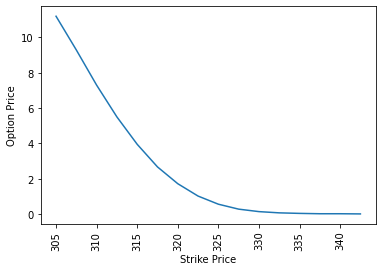

In [7]:
plt.plot(df['Strike'], df['Close'])
plt.xticks(rotation = '90')
plt.ylabel('Option Price')
plt.xlabel('Strike Price')
plt.show()

#Implied Distribution

In [8]:
delta = 2.5

C1 = np.array(df['Close'][0:-2])
C2 = np.array(df['Close'][1:-1])
C3 = np.array(df['Close'][2:])

In [9]:
Partial = (C1 + C3 - 2*C2)/(delta**2)
Partial = np.clip(Partial, 0, 100)

In [10]:
r = 0.0341 / 252
T = 6

In [11]:
RNP = np.exp(r*T)*Partial
RNP.sum()

0.3186586154475407

Text(0, 0.5, 'Probability')

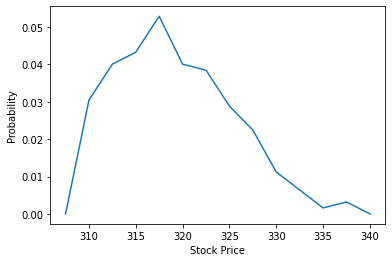

In [12]:
plt.plot(df['Strike'][1:-1], RNP)
plt.xlabel('Stock Price')
plt.ylabel('Probability')

#Implied Volatility

In [13]:
from scipy.stats import norm

In [14]:
def bs_call(s, r, t, sig, k):
  r = r
  sig = sig/np.sqrt(250)
  d1 = (np.log(s/k) + (r+(sig**2)/2)*t)/(sig*np.sqrt(t))
  d2 = (np.log(s/k) + (r-(sig**2)/2)*t)/(sig*np.sqrt(t))
  call = s*norm.cdf(d1) - k*np.exp(-r*t)*norm.cdf(d2)
  return call

In [15]:
r = 0.0341 / 252
T = 6
S = 314.80

temp = []
for i in range(len(df)):
  error = []
  for sig in np.linspace(0.01, 0.4, 100):
    error.append((bs_call(S, r, T, sig, df['Strike'][i]) - df['Close'][i])**2)
  vol = np.linspace(0.01, 0.4, 100)[np.argmin(error)]
  temp.append(vol)

Text(0, 0.5, 'Implied Volatility')

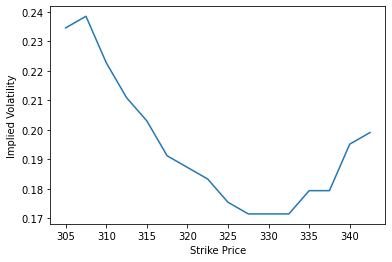

In [16]:
plt.plot(df['Strike'], temp)
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')